<a href="https://colab.research.google.com/github/Himaaa-07/SOURCE-CODE-DATA-SET-2-/blob/main/DATASET_2(HEART_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB
index
69983    1
69982    1
69981    1
69980    1
69979    1
        ..
4        1
3        1
2        1
1        1
0        1
Name: count, Length: 70000, dtype: int64


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,SVM,0.724,0.738,0.693,0.715,0.782
1,Random Forest,0.710,0.713,0.701,0.707,0.765
2,KNN,0.645,0.649,0.630,0.639,0.684
3,Decision Tree,0.634,0.637,0.621,0.629,0.636



Best model selected: SVM


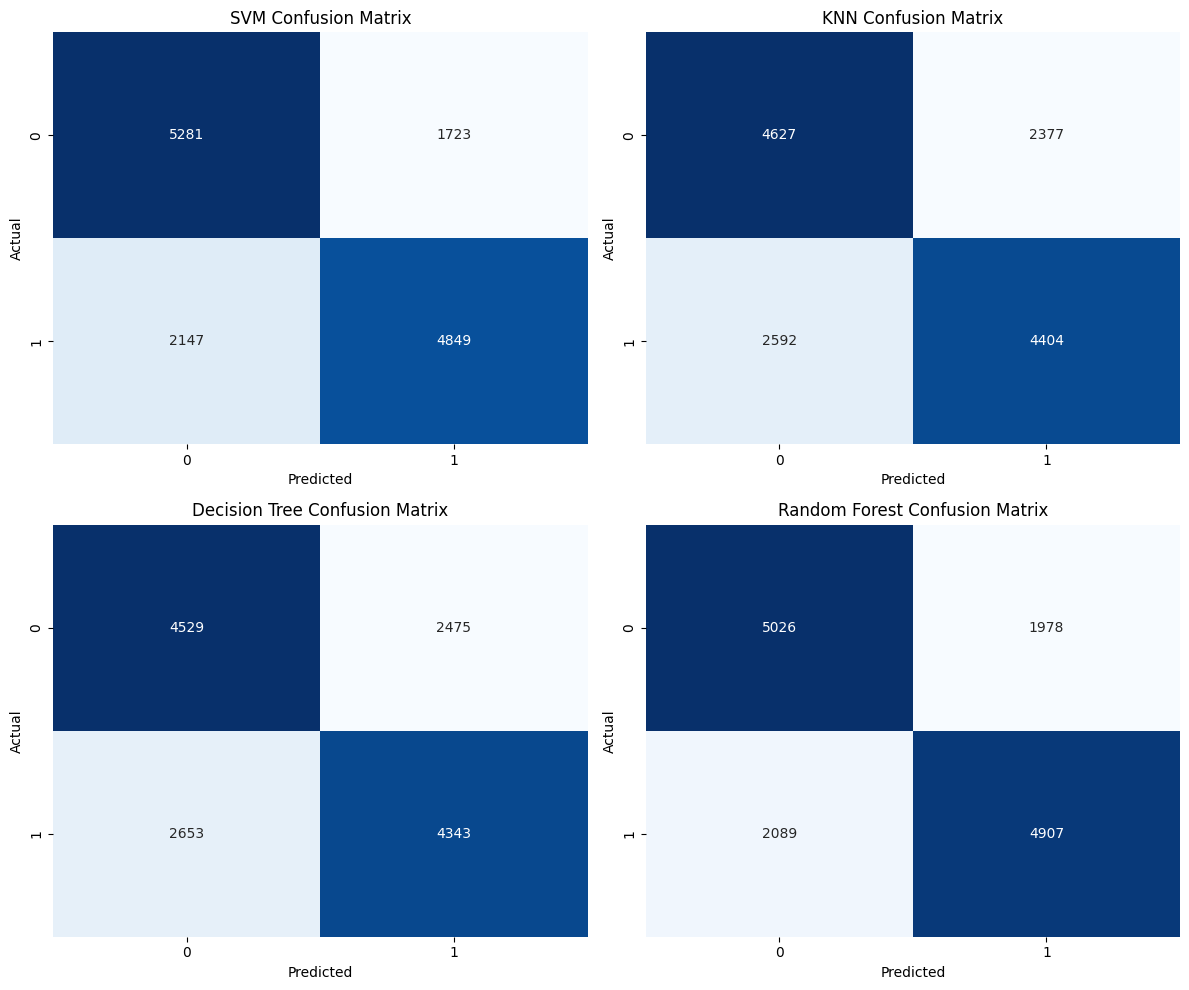

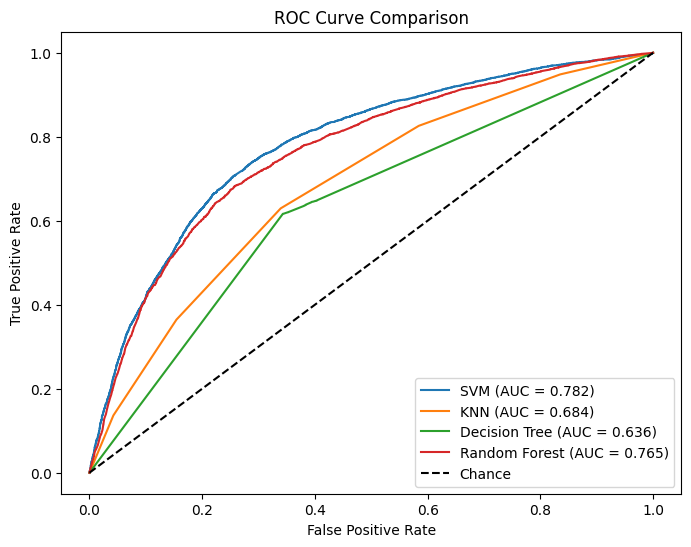

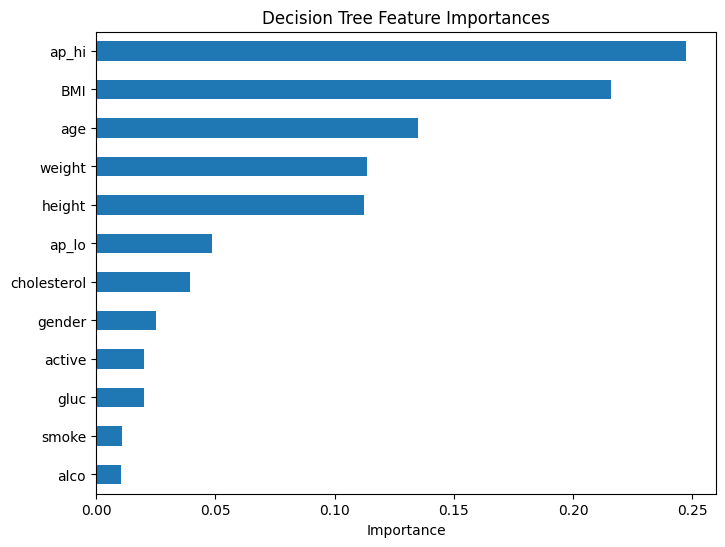

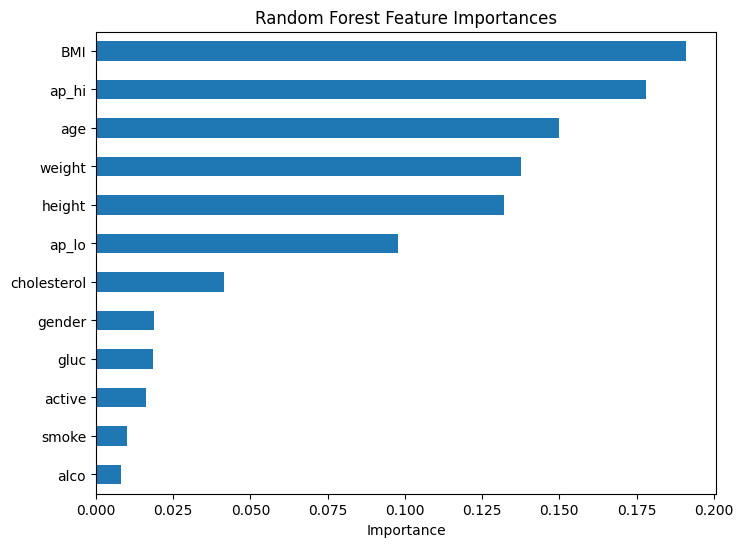

<Figure size 1000x500 with 0 Axes>

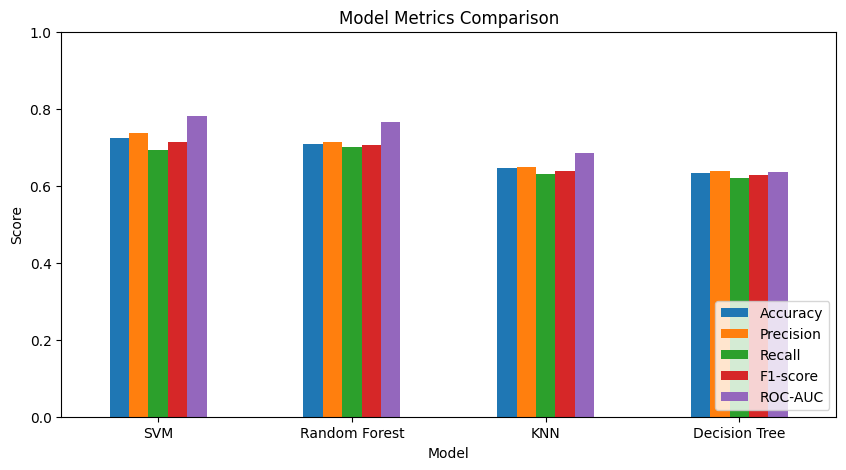


--- Example new patient prediction ---
Model used: SVM
Predicted label: The person HAS cardiovascular disease (risk probability = 0.706)

Best model test set classification report:
              precision    recall  f1-score   support

           0     0.7110    0.7540    0.7318      7004
           1     0.7378    0.6931    0.7148      6996

    accuracy                         0.7236     14000
   macro avg     0.7244    0.7236    0.7233     14000
weighted avg     0.7244    0.7236    0.7233     14000

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ef7a70009a621e3837.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/heart_data.csv')
df.head()
df.tail()
df.info()
for i in df.columns:
  print(df[i].value_counts())
  print('^'*80)
df = df.drop(columns=['index', 'id'])
df['age'] = (df['age'] / 365).round(0)

df['BMI'] = df['weight'] / ((df['height']/100) ** 2)

X = df.drop('cardio', axis=1)
y = df['cardio']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve, auc)


df_proc = df.copy()

for c in ['index','id']:
    if c in df_proc.columns:
        df_proc = df_proc.drop(columns=c)


if df_proc['age'].mean() > 1000:
    df_proc['age'] = (df_proc['age'] / 365).round().astype(int)

if ('height' in df_proc.columns) and ('weight' in df_proc.columns):
    df_proc['BMI'] = df_proc['weight'] / ((df_proc['height']/100) ** 2)

X = df_proc.drop(columns=['cardio'])
y = df_proc['cardio']

RND = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND, stratify=y)

scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns=numeric_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns=numeric_cols, index=X_test.index)


X_train_tree = X_train[numeric_cols].copy()
X_test_tree  = X_test[numeric_cols].copy()

models = {
    "SVM": SVC(probability=True, random_state=RND),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=RND),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=RND, n_jobs=-1)
}

results = {}
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train_tree, y_train)
        y_pred = model.predict(X_test_tree)
        y_proba = model.predict_proba(X_test_tree)[:,1]
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "y_proba": y_proba
    }

metrics_list = []
for name, r in results.items():
    y_pred = r['y_pred']
    y_proba = r['y_proba']
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)
    metrics_list.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    })

metrics_df = pd.DataFrame(metrics_list).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
metrics_df_rounded = metrics_df.copy()
for c in ["Accuracy","Precision","Recall","F1-score","ROC-AUC"]:
    metrics_df_rounded[c] = metrics_df_rounded[c].map(lambda x: round(x, 3))
print("=== Evaluation Table ===")
display(metrics_df_rounded)

best_idx = metrics_df.sort_values(by=['Accuracy','ROC-AUC'], ascending=False).index[0]
best_model_name = metrics_df.loc[best_idx, "Model"]
best_model = results[best_model_name]['model']
print(f"\nBest model selected: {best_model_name}")

# --- Visualizations ---

# Confusion matrices
plt.figure(figsize=(12,10))
for i, (name, r) in enumerate(results.items(), 1):
    cm = confusion_matrix(y_test, r['y_pred'])
    plt.subplot(2,2,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curves
plt.figure(figsize=(8,6))
for name, r in results.items():
    fpr, tpr, _ = roc_curve(y_test, r['y_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc='lower right')
plt.show()

# Feature importances for tree models (Decision Tree & Random Forest)
features = numeric_cols
if "Decision Tree" in results:
    dt = results["Decision Tree"]['model']
    fi_dt = getattr(dt, "feature_importances_", None)
    if fi_dt is not None:
        fi_dt_series = pd.Series(fi_dt, index=features).sort_values(ascending=True)
        plt.figure(figsize=(8,6))
        fi_dt_series.plot(kind='barh')
        plt.title("Decision Tree Feature Importances")
        plt.xlabel("Importance")
        plt.show()

if "Random Forest" in results:
    rf = results["Random Forest"]['model']
    fi_rf = getattr(rf, "feature_importances_", None)
    if fi_rf is not None:
        fi_rf_series = pd.Series(fi_rf, index=features).sort_values(ascending=True)
        plt.figure(figsize=(8,6))
        fi_rf_series.plot(kind='barh')
        plt.title("Random Forest Feature Importances")
        plt.xlabel("Importance")
        plt.show()

# Metrics comparison bar chart
plt.figure(figsize=(10,5))
plot_df = metrics_df.set_index("Model")[["Accuracy","Precision","Recall","F1-score","ROC-AUC"]]
plot_df.plot(kind='bar', figsize=(10,5), ylim=(0,1))
plt.title("Model Metrics Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# --- Prediction function for a new patient ---
def predict_cvd(patient_data: dict, model_name: str = None, threshold: float = 0.5):
    """
    patient_data: dict with same feature keys as X (numeric_cols)
    model_name: if None, uses best selected model
    threshold: probability threshold for classification
    """
    if model_name is None:
        model_name = best_model_name
    model_info = results[model_name]
    model = model_info['model']


    patient_df = pd.DataFrame([patient_data])
    for c in numeric_cols:
        if c not in patient_df.columns:
            patient_df[c] = X_train[c].mean()
    patient_df = patient_df[numeric_cols]

    if model_name in ["SVM", "KNN"]:
        arr = scaler.transform(patient_df)
        proba = model.predict_proba(arr)[0][1]
        pred = int(proba >= threshold)
    else:
        arr = patient_df.values
        proba = model.predict_proba(arr)[0][1]
        pred = int(proba >= threshold)

    label = "HAS cardiovascular disease" if pred == 1 else "does NOT have cardiovascular disease"
    print(f"Model used: {model_name}")
    print(f"Predicted label: The person {label} (risk probability = {proba:.3f})")
    return {"model": model_name, "prediction": pred, "probability": proba}


example_patient = {}
for c in numeric_cols:
    example_patient[c] = X_train[c].median()

if 'age' in numeric_cols:
    example_patient['age'] = 55
if 'gender' in numeric_cols:
    example_patient['gender'] = 1
if 'height' in numeric_cols:
    example_patient['height'] = 170
if 'weight' in numeric_cols:
    example_patient['weight'] = 70.0
if 'ap_hi' in numeric_cols:
    example_patient['ap_hi'] = 140
if 'ap_lo' in numeric_cols:
    example_patient['ap_lo'] = 90
if 'cholesterol' in numeric_cols:
    example_patient['cholesterol'] = 2
if 'gluc' in numeric_cols:
    example_patient['gluc'] = 1
if 'smoke' in numeric_cols:
    example_patient['smoke'] = 0
if 'alco' in numeric_cols:
    example_patient['alco'] = 0
if 'active' in numeric_cols:
    example_patient['active'] = 1
if 'BMI' in numeric_cols:
    example_patient['BMI'] = 70.0 / ((170/100)**2)

print("\n--- Example new patient prediction ---")
predict_result = predict_cvd(example_patient)

from sklearn.metrics import classification_report
best_r = results[best_model_name]
print("\nBest model test set classification report:")
print(classification_report(y_test, best_r['y_pred'], digits=4))

import gradio as gr

def gradio_predict(
    age, gender, height, weight, ap_hi, ap_lo,
    cholesterol, gluc, smoke, alco, active
):
    BMI = weight / ((height/100)**2)
    patient_data = {
        "age": age,
        "gender": gender,
        "height": height,
        "weight": weight,
        "ap_hi": ap_hi,
        "ap_lo": ap_lo,
        "cholesterol": cholesterol,
        "gluc": gluc,
        "smoke": smoke,
        "alco": alco,
        "active": active,
        "BMI": BMI
    }

    result = predict_cvd(patient_data)
    label = "HAS cardiovascular disease" if result['prediction']==1 else "does NOT have cardiovascular disease"
    return f"{label}\n Risk probability: {result['probability']:.3f}\n(Model used: {result['model']})"

interface = gr.Interface(
    fn=gradio_predict,
    inputs=[
        gr.Number(label="Age (years)", value=55),
        gr.Radio([1,2], label="Gender (1=Male, 2=Female)", value=1),
        gr.Number(label="Height (cm)", value=170),
        gr.Number(label="Weight (kg)", value=70.0),
        gr.Number(label="Systolic BP (ap_hi)", value=140),
        gr.Number(label="Diastolic BP (ap_lo)", value=90),
        gr.Radio([1,2,3], label="Cholesterol", value=2),
        gr.Radio([1,2,3], label="Glucose", value=1),
        gr.Radio([0,1], label="Smoke", value=0),
        gr.Radio([0,1], label="Alcohol", value=0),
        gr.Radio([0,1], label="Active", value=1)
    ],
    outputs="text",
    title="Cardiovascular Disease Predictor",
    description="Enter patient data to predict whether they have cardiovascular disease."
)

interface.launch()
